In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd

In [2]:
df=pd.read_csv("ipl_clean.csv")

In [3]:
df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Team_1_state,Team_2_state,win_city
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Hyderabad,Bangalore,Hyderabad
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Mumbai,Pune,Pune


<Axes: xlabel='win_city'>

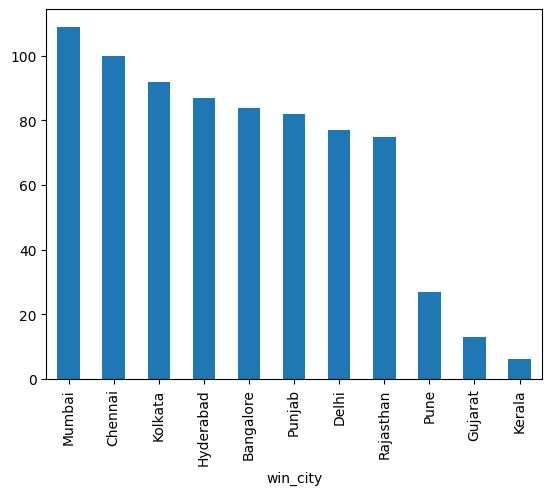

In [4]:
df['win_city'].value_counts().plot(kind='bar')

In [5]:
grouped_sum = df.groupby('win_city')['win_city'].count().reset_index(name="count")
grouped_sum

,win_city,count
0,Bangalore,84
1,Chennai,100
2,Delhi,77
3,Gujarat,13
4,Hyderabad,87
5,Kerala,6
6,Kolkata,92
7,Mumbai,109
8,Pune,27
9,Punjab,82


In [6]:
import fiona
fiona.Env(SHAPE_RESTORE_SHX='YES')

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read shapefile for Indian states
india_states = gpd.read_file("gadm41_IND_1.shp")



In [8]:
india_states.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,IND.1_1,IND,India,Andaman and Nicobar,Andaman & Nicobar Islands|Andama,NA,Union Territor,Union Territory,NA,IN.AN,NA,"MULTIPOLYGON (((93.79078 6.85139, 93.79092 6.8..."
1,IND.2_1,IND,India,Andhra Pradesh,NA,NA,State,State,NA,IN.AP,IN-AP,"MULTIPOLYGON (((78.73952 13.04549, 78.73218 13..."
2,IND.3_1,IND,India,Arunachal Pradesh,Agence de la Frontière du Nord-E,NA,State,State,NA,IN.AR,IN-AR,"POLYGON ((95.3683 27.10736, 95.37366 27.108, 9..."
3,Z07.3_1,Z07,India,Arunachal Pradesh,Agence de la Frontière du Nord-E,NA,State,State,NA,IN.AR,NA,"POLYGON ((94.19125 27.49632, 94.1869 27.49081,..."
4,IND.4_1,IND,India,Assam,NA,NA,State,State,NA,IN.AS,IN-AS,"POLYGON ((92.7545 24.50112, 92.75133 24.49437,..."


In [9]:
india_states.columns

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')

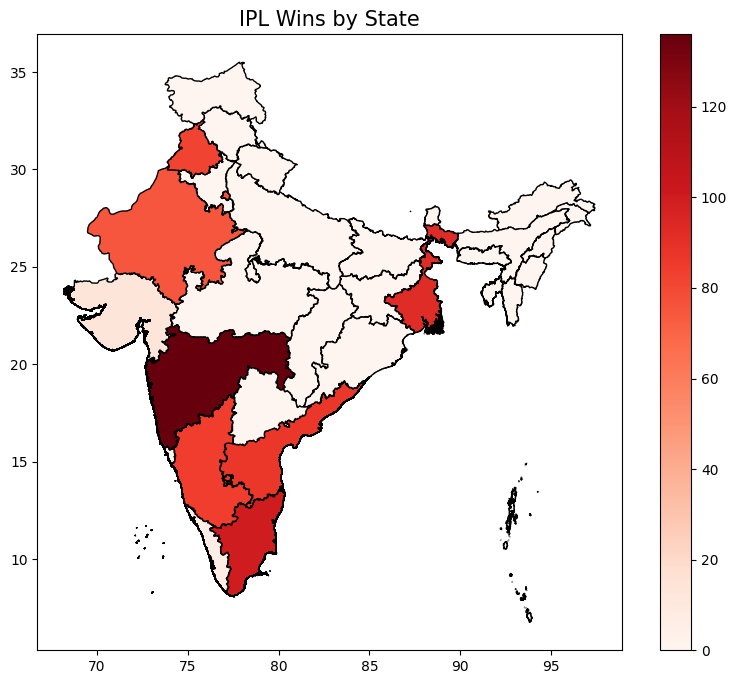

In [10]:
city_to_state = {
    "Hyderabad": "Andhra Pradesh",
    "Mumbai": "Maharashtra",
    "Gujarat": "Gujarat",          
    "Pune": "Maharashtra",
    "Bangalore": "Karnataka",
    "Kolkata": "West Bengal",
    "Delhi": "NCT of Delhi",
    "Punjab": "Punjab",            
    "Chennai": "Tamil Nadu",
    "Rajasthan": "Rajasthan",
    "Kerala": "Kerala"
}


df["win_state"] = df["win_city"].map(city_to_state)


win_counts = df.groupby("win_state").size().reset_index(name="wins")


merged = india_states.merge(win_counts, left_on="NAME_1", right_on="win_state", how="left")


merged["wins"] = merged["wins"].fillna(0)


ax = merged.plot(column="wins", cmap="Reds", legend=True, figsize=(10,8), edgecolor="black")

ax.set_title("IPL Wins by State", fontsize=15)


plt.show()

In [11]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Team_1_state,Team_2_state,win_city,win_state
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Hyderabad,Bangalore,Hyderabad,Andhra Pradesh
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Mumbai,Pune,Pune,Maharashtra
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Gujarat,Kolkata,Kolkata,West Bengal
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Pune,Punjab,Punjab,Punjab
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Bangalore,Delhi,Bangalore,Karnataka



4.3 Toss decision analysis
toss_decision
field    463
bat      293
Name: count, dtype: int64


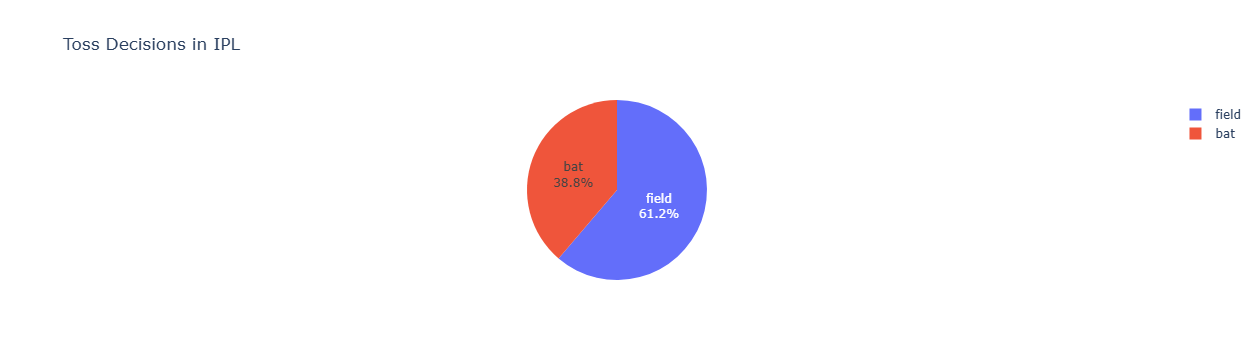

In [14]:
import plotly.express as px
print("\n4.3 Toss decision analysis")
toss_decisions = df['toss_decision'].value_counts()
print(toss_decisions)
fig3 = px.pie(values=toss_decisions.values, names=toss_decisions.index,
              title='Toss Decisions in IPL')
fig3.update_traces(textposition='inside', textinfo='percent+label')
fig3.show()


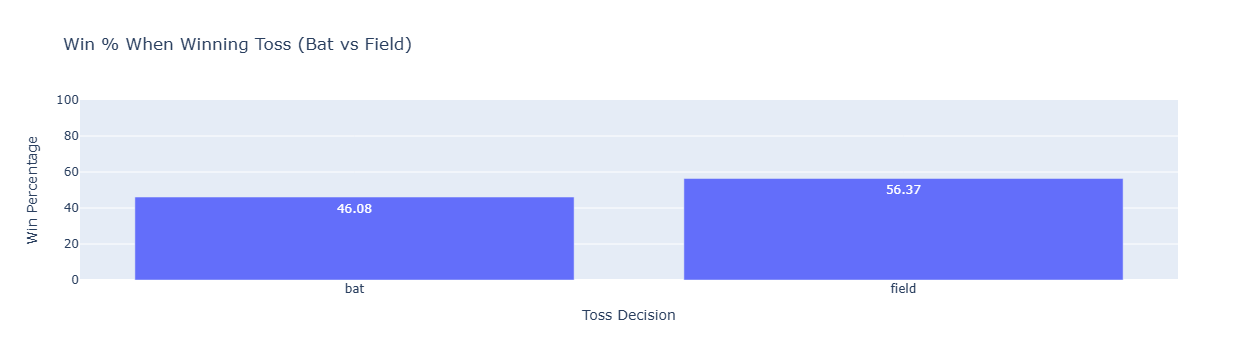

In [16]:
import plotly.express as px

df["toss_winner_won_match"] = (df["toss_winner"] == df["winner"]).astype(int)
valid_matches = df[~df["winner"].isin(["No Result", "Unknown"])]
toss_decision_impact = (
    valid_matches.groupby("toss_decision")["toss_winner_won_match"].mean() * 100
)

fig = px.bar(
    x=toss_decision_impact.index,
    y=toss_decision_impact.values,
    title="Win % When Winning Toss (Bat vs Field)",
    labels={"x": "Toss Decision", "y": "Win Percentage"},
    text=toss_decision_impact.values.round(2)  # show % on bars
)
fig.update_layout(yaxis_range=[0, 100])
fig.show()



Venue analysis


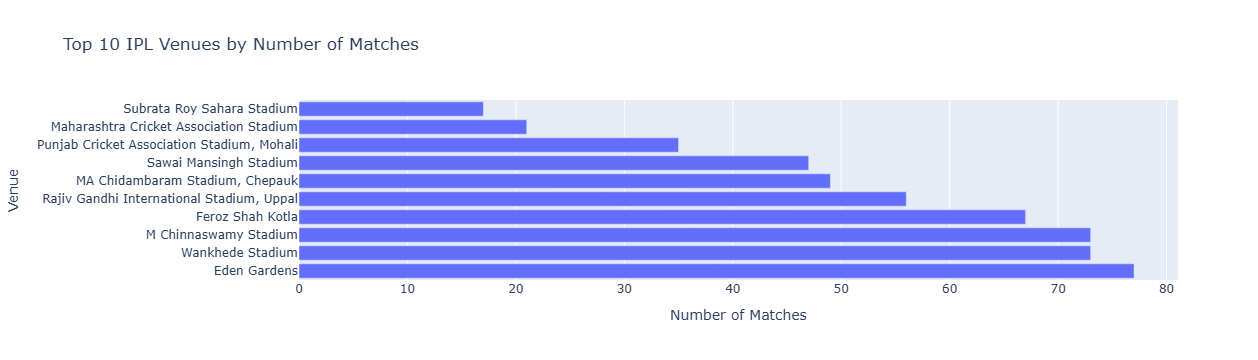

In [21]:
print("\nVenue analysis")
venue_counts = df['venue'].value_counts().head(10)
fig5 = px.bar(x=venue_counts.values, y=venue_counts.index, orientation='h',
              title='Top 10 IPL Venues by Number of Matches',
              labels={'x': 'Number of Matches', 'y': 'Venue'})
fig5.update_xaxes(title_text="Number of Matches")
fig5.update_yaxes(title_text="Venue")
fig5.show()



Player of the match analysis


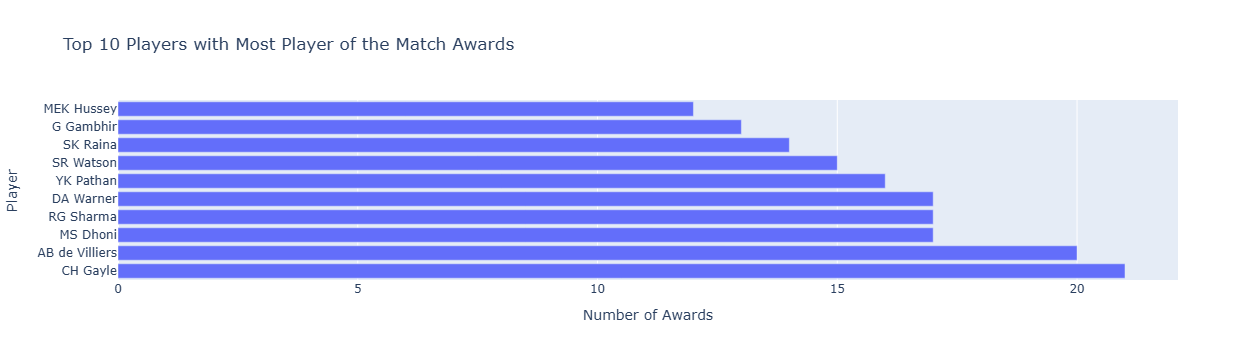

In [22]:
print("\nPlayer of the match analysis")
player_of_match_counts = df[df['player_of_match'] != 'Not Awarded']['player_of_match'].value_counts().head(10)
fig6 = px.bar(x=player_of_match_counts.values, y=player_of_match_counts.index, orientation='h',
              title='Top 10 Players with Most Player of the Match Awards',
              labels={'x': 'Number of Awards', 'y': 'Player'})
fig6.update_xaxes(title_text="Number of Awards")
fig6.update_yaxes(title_text="Player")
fig6.show()



4.7 Win margin analysis


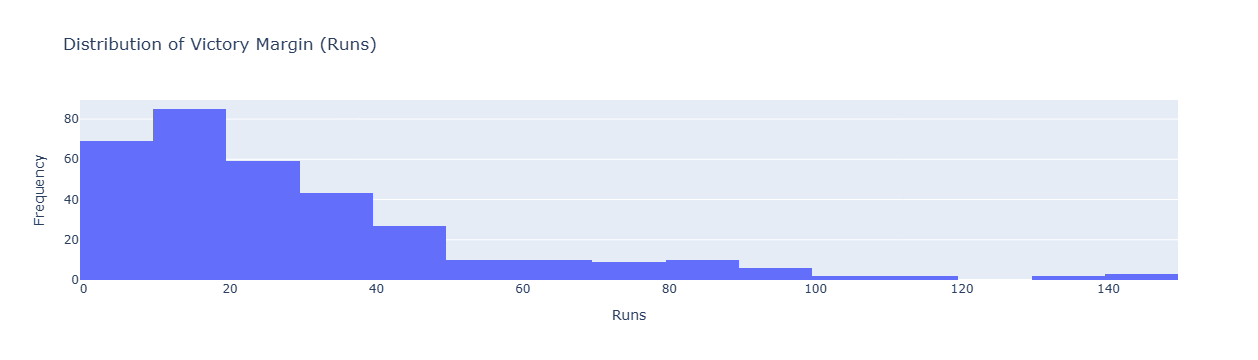

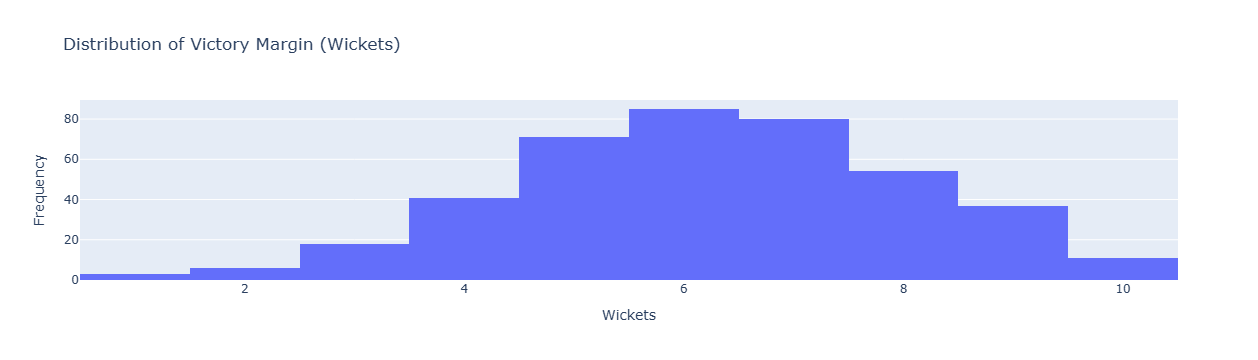

In [23]:
print("\n4.7 Win margin analysis")
fig7 = px.histogram(df[df['win_by_runs'] > 0], x='win_by_runs', nbins=20,
                    title='Distribution of Victory Margin (Runs)')
fig7.update_layout(xaxis_title='Runs', yaxis_title='Frequency')
fig7.show()
fig8 = px.histogram(df[df['win_by_wickets'] > 0], x='win_by_wickets', nbins=10,
                    title='Distribution of Victory Margin (Wickets)')
fig8.update_layout(xaxis_title='Wickets', yaxis_title='Frequency')
fig8.show()
